In [1]:
#@title Mount google drive and git pull
# this cell is to load the google drive to the directory
from google.colab import drive
drive.mount('/content/drive')

""" If it is the first time to set up the directory
%cd /content/drive/My\ Drive/Hpython/

!git clone https://github.com/chenhao1umbc/WSCDL.git
%cd WSCDL/
print('')
!ls
"""

# setting up the working directory
%cd /content/drive/My\ Drive/Hpython/WSCDL/
%rm __pycache__/ -rf
!git pull
print('')
!ls

# !git checkout others_code
# import all the important and necessary functions and classes

print('\n***done with updating files***\n')

Mounted at /content/drive
/content/drive/My Drive/Hpython/WSCDL
Already up to date.

 DeepMIML	  plot_figures.py    speed_compare.py   tunning.py
 Deep_MIML_repr  '__pycache__ (1)'   test_res.pt        tunning_rough.pt
 figures	 '__pycache__ (2)'   train_val.pt       utils2.py
 main_2d.py	  README.md	     tunning.log        utils.py
 main_toy.py	  see_tunning.py     tunning.pt

***done with updating files***



In [4]:
from utils2 import *

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
opts = OPT(C=10, K0=1, K=2)
opts.init, opts.shuffle, opts.show_details = 'rand', True, False
opts.Dh, opts.Dw, opts.batch_size = 100, 25, -1
opts.lamb, opts.lamb0, opts.eta, opts.mu = 1, 0.1, 1, 0.1 #sparsity, label, low rank



Running on GPU


In [ ]:
#@title  Tune Dw
for Dw in [15, 35, 55, 95, 145, 205]:
    res = []
    for runs in range(5):
        opts.seed = runs
        X, Y, yy = load_data(opts, data='train') # shape of [n_sample, f, t]
        X_te, Y_te, yy_te = load_data(opts, data='val')

        opts.Dw, opts.lamb, opts.lamb0, opts.eta, opts.mu = \
                            Dw, 0.1, 0.1, 0.1, 0.1 
        D, D0, S, S0, W, loss = train(X, Y, opts)
        save_results(D, D0, S, S0, W, opts, loss)

        # res = torch.load('tunning.pt')
        _, _, St, S0t, _ = init(X_te, opts)
        acc, y_hat, St, S0t, loss_t = test(D, D0, St, S0t, W, X_te, Y_te, opts)
        print('The validation accuracy, recall and precision are : ',\
                acc.acc, acc.recall, acc.f1)
        print('\n')
        res.append(acc.f1)
    print(f'Dw = {Dw}the 5 run averaged f1 score is : {sum(res)/5} \n  ____________________________________\n')

"[15, 35, 55, 95, 145, 205]"
"0.5341, 0.5724, 0.5613, 0.5876, 0.5828, 0.5497"
"The best is 95, 0.5876"

In [ ]:
for lamb in [10, 1, 0.1, 0.01, 0.001]:
    res = []
    for runs in range(5):
        opts.seed = runs
        X, Y, yy = load_data(opts, data='train') # shape of [n_sample, f, t]
        X_te, Y_te, yy_te = load_data(opts, data='val')

        opts.Dw, opts.lamb, opts.lamb0, opts.eta, opts.mu = \
                            95, lamb, 0.1, 0.1, 0.1 
        D, D0, S, S0, W, loss = train(X, Y, opts)
        save_results(D, D0, S, S0, W, opts, loss)

        # res = torch.load('tunning.pt')
        _, _, St, S0t, _ = init(X_te, opts)
        acc, y_hat, St, S0t, loss_t = test(D, D0, St, S0t, W, X_te, Y_te, opts)
        print('The validation accuracy, recall and precision are : ',\
                acc.acc, acc.recall, acc.f1)
        print('\n')
        res.append(acc.f1)
    print(f'lamb = {lamb}the 5 run averaged f1 score is : {sum(res)/5} \n  ____________________________________\n')
"[10, 1, 0.1, 0.01, 0.001]"
"0, 0, ~, 0.45, 0.38"
"The best is 0.1, "

In [ ]:
for lamb0 in [1, 0.01]:
    res = []
    for runs in range(5):
        opts.seed = runs
        X, Y, yy = load_data(opts, data='train') # shape of [n_sample, f, t]
        X_te, Y_te, yy_te = load_data(opts, data='val')

        opts.Dw, opts.lamb, opts.lamb0, opts.eta, opts.mu = \
                            95, 0.1, lamb0, 0.1, 0.1 
        D, D0, S, S0, W, loss = train(X, Y, opts)
        save_results(D, D0, S, S0, W, opts, loss)

        # res = torch.load('tunning.pt')
        _, _, St, S0t, _ = init(X_te, opts)
        acc, y_hat, St, S0t, loss_t = test(D, D0, St, S0t, W, X_te, Y_te, opts)
        print('The validation accuracy, recall and precision are : ',\
                acc.acc, acc.recall, acc.f1)
        print('\n')
        res.append(acc.f1)
    print(f'lamb0 = {lamb0}the 5 run averaged f1 score is : {sum(res)/5} \n  ____________________________________\n')
"[1, 0.1, 0.01, 0.001]"
"0.5812, ~, 0.4490, 0.4506"
"The best is "

The initial loss function value is :6.0487e+03
In the 0 epoch, the training time is :20.83
In the 3 epoch, the training time is :16.64
In the 6 epoch, the training time is :14.12
In the 9 epoch, the training time is :13.11
In the 12 epoch, the training time is :12.53
In the 15 epoch, the training time is :11.44
In the 18 epoch, the training time is :11.05
In the 21 epoch, the training time is :10.60
In the 24 epoch, the training time is :10.62
In the 27 epoch, the training time is :10.38
In the 30 epoch, the training time is :10.18
loss is not going down-- break
After 33 epochs, the loss function value is 2.2426e+03
All done, the total running time is 441.28 

Sparse coding initial loss function value is 9.4900e+02:
In the 0 epoch, the sparse coding time is :3.54
In the 3 epoch, the sparse coding time is :3.36
In the 6 epoch, the sparse coding time is :3.27
In the 9 epoch, the sparse coding time is :3.10
In the 12 epoch, the sparse coding time is :3.03
break condition loss value diff s

'The best is '

In [ ]:
for eta in [10, 1, 0.1, 0.01, 0.001]:
    res = []
    for runs in range(5):
        opts.seed = runs
        X, Y, yy = load_data(opts, data='train') # shape of [n_sample, f, t]
        X_te, Y_te, yy_te = load_data(opts, data='val')

        opts.Dw, opts.lamb, opts.lamb0, opts.eta, opts.mu = \
                            95, 0.1, 0.1, eta, 0.1 
        D, D0, S, S0, W, loss = train(X, Y, opts)
        save_results(D, D0, S, S0, W, opts, loss)

        # res = torch.load('tunning.pt')
        _, _, St, S0t, _ = init(X_te, opts)
        acc, y_hat, St, S0t, loss_t = test(D, D0, St, S0t, W, X_te, Y_te, opts)
        print('The validation accuracy, recall and precision are : ',\
                acc.acc, acc.recall, acc.f1)
        print('\n')
        res.append(acc.f1)
    print(f'eta = {eta}the 5 run averaged f1 score is : {sum(res)/5} \n  ____________________________________\n')
"[10, 1, 0.1, 0.01, 0.001]"
"0.5831, 0.4437, 0.5858, 0.6076, 0.5976"
"The best is 0.01"

In [ ]:
for mu in [10, 1]:
    res = []
    for runs in range(5):
        opts.seed = runs
        X, Y, yy = load_data(opts, data='train') # shape of [n_sample, f, t]
        X_te, Y_te, yy_te = load_data(opts, data='val')

        opts.Dw, opts.lamb, opts.lamb0, opts.eta, opts.mu = \
                            95, 0.1, 0.1, 0.01, mu 
        D, D0, S, S0, W, loss = train(X, Y, opts)
        save_results(D, D0, S, S0, W, opts, loss)

        # res = torch.load('tunning.pt')
        _, _, St, S0t, _ = init(X_te, opts)
        acc, y_hat, St, S0t, loss_t = test(D, D0, St, S0t, W, X_te, Y_te, opts)
        print('The validation accuracy, recall and precision are : ',\
                acc.acc, acc.recall, acc.f1)
        print('\n')
        res.append(acc.f1)
    print(f'mu = {mu}, the 5 run averaged f1 score is : {sum(res)/5} \n  ____________________________________\n')
"[10, 1, 0.1, 0.01, 0.001]"
"0.6035, ~, 0.6120, ~, 0.6121"
"The best is "

The initial loss function value is :1.1612e+04
In the 0 epoch, the training time is :19.28
In the 3 epoch, the training time is :20.94
In the 6 epoch, the training time is :17.44
In the 9 epoch, the training time is :15.22
In the 12 epoch, the training time is :13.61
In the 15 epoch, the training time is :12.38
In the 18 epoch, the training time is :12.27
loss is not going down-- break
After 20 epochs, the loss function value is 8.1560e+03
All done, the total running time is 330.53 

Sparse coding initial loss function value is 9.4900e+02:
In the 0 epoch, the sparse coding time is :3.82
In the 3 epoch, the sparse coding time is :3.65
In the 6 epoch, the sparse coding time is :3.38
In the 9 epoch, the sparse coding time is :3.38
In the 12 epoch, the sparse coding time is :3.19
break condition loss value diff satisfied
The validation accuracy, recall and precision are :  0.669 0.6710182767624021 0.608284023668639


The initial loss function value is :1.1654e+04
In the 0 epoch, the traini

'The best is '

In [ ]:
#@title Test result

res = []
for runs in range(5):
    opts.seed = runs
    X, Y, yy = load_data(opts, data='train') # shape of [n_sample, f, t]
    X_te, Y_te, yy_te = load_data(opts, data='test')

    opts.Dw, opts.lamb, opts.lamb0, opts.eta, opts.mu = \
                        95, 0.1, 0.1, 0.01, 0.1 
    D, D0, S, S0, W, loss = train(X, Y, opts)
    save_results(D, D0, S, S0, W, opts, loss)

    # res = torch.load('tunning.pt')
    _, _, St, S0t, _ = init(X_te, opts)
    acc, y_hat, St, S0t, loss_t = test(D, D0, St, S0t, W, X_te, Y_te, opts)
    print('The validation accuracy, recall and precision are : ',\
            acc.acc, acc.recall, acc.f1)
    print('\n')
    res.append(acc.f1)
print(f'the 5 run averaged f1 score is : {sum(res)/5} \n  ____________________________________\n')

The initial loss function value is :5.6719e+03
In the 0 epoch, the training time is :14.56
In the 3 epoch, the training time is :15.35
In the 6 epoch, the training time is :13.54
In the 9 epoch, the training time is :12.23
In the 12 epoch, the training time is :11.42
In the 15 epoch, the training time is :10.76
In the 18 epoch, the training time is :10.61
In the 21 epoch, the training time is :10.30
In the 24 epoch, the training time is :10.48
In the 27 epoch, the training time is :10.80
In the 30 epoch, the training time is :10.49
In the 33 epoch, the training time is :10.37
In the 36 epoch, the training time is :10.10
In the 39 epoch, the training time is :10.05
In the 42 epoch, the training time is :9.86
In the 45 epoch, the training time is :9.89
In the 48 epoch, the training time is :9.48
In the 51 epoch, the training time is :9.55
In the 54 epoch, the training time is :9.51
In the 57 epoch, the training time is :9.43
loss is not going down-- break
After 59 epochs, the loss functi

0.6753245251319706


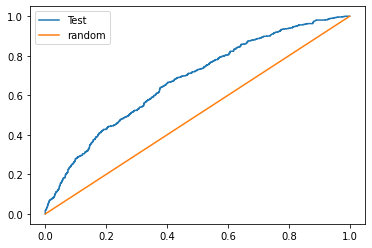

In [ ]:
# torch.save([acc, y_hat, St, S0t, loss_t], 'test_res.pt')
acc, y_hat, St, S0t, loss_t = torch.load('test_res.pt')
X_te, Y_te, yy_te = load_data(opts, data='test')

yh = y_hat.cpu()
y = Y_te.cpu()
a = metrics.roc_curve(y.flatten(), yh.flatten())
plt.plot(a[0], a[1])
plt.plot(torch.linspace(0, 1, a[0].shape[0]), torch.linspace(0, 1, a[0].shape[0]))
print(metrics.auc(a[0], a[1]))
plt.legend(['Test', 'random'])

Validation auc  0.758593548332494
Test auc  0.6753245251319706
Random auc  0.507269552198949


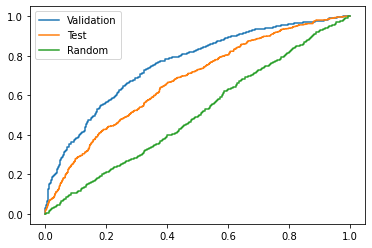

In [ ]:
# torch.save([acc, y_hat, St, S0t, loss_t], 'test_res.pt')
# torch.save([D, D0, W, acc, y_hat, St, S0t, loss_t], 'train_val.pt')
opts.seed = 4
X_te, Y_te, yy_te = load_data(opts, data='val')
D, D0, W, acc, y_hat, St, S0t, loss_t = torch.load('train_val.pt')
yh = y_hat.cpu()
y = Y_te.cpu()
a = metrics.roc_curve(y.flatten(), yh.flatten())
plt.plot(a[0], a[1])
print('Validation auc ', metrics.auc(a[0], a[1]))


X_te, Y_te, yy_te = load_data(opts, data='test')
acc, y_hat, St, S0t, loss_t = torch.load('test_res.pt')
yh = y_hat.cpu()
y = Y_te.cpu()
a = metrics.roc_curve(y.flatten(), yh.flatten())
plt.plot(a[0], a[1])
print('Test auc ', metrics.auc(a[0], a[1]))


a = torch.rand(Y_te.shape)
a = metrics.roc_curve(y.flatten(), a.flatten())
plt.plot(a[0], a[1])
print('Random auc ', metrics.auc(a[0], a[1]))

plt.legend(['Validation', 'Test', 'Random'])